# Custom Layers in Keras

# Task 1: Importing Libraries

In [3]:
import tensorflow as tf
import utils
import matplotlib.pyplot as plt
%matplotlib inline

print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.1.0


# Task 2: Import and Visualize Dataset

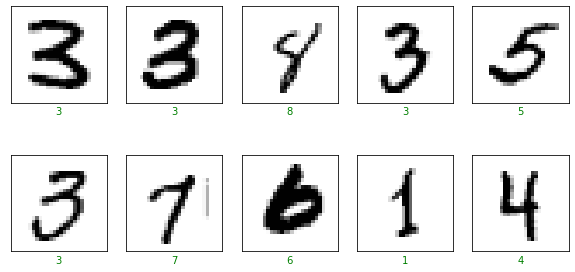

In [6]:
(x_train, y_train), (x_test, y_test) = utils.load_data()
utils.plot_random_examples(x_train, y_train).show() 

# Task 3: Creating a Custom Layer

In [8]:
class ParametricRelu(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ParametricRelu, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.alpha = self.add_weight(
            name='alpha', shape=(input_shape(1,)),
            initializer='zeros',
            trainable=True
        )
        super(ParametricRelu, self). build(input_shape)
        
    def call(self, x):
        return tf.maximum(0., x) + self.alpha*tf.minimum(0., x)

# Task 4: Creating the Model

In [10]:
def create_model(use_prelu=True):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, input_shape=(784,)))
    if use_prelu:
        model.add(ParametricRelu())
    else:
        model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = create_model()
model.sumary()

TypeError: 'TensorShape' object is not callable

# Task 5: Model Training

# Task 6: Comparison with ReLU